<a href="https://colab.research.google.com/github/jhcool1988/HelloMVC/blob/master/clustering3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Feature1  Feature2  Feature3  Cluster Color  Size
0   0.940036  0.161574  0.888948      2.0     b    50
1   0.687042  0.780603  0.789547      0.0     r    50
2   0.621150  0.974346  0.838011      2.0     b    50
3   0.215100  0.655552  0.215950      2.0     b    50
4   0.479677  0.773325  0.611523      0.0     r    50
5   0.202379  0.914481  0.016286      2.0     b    50
6   0.410243  0.515496  0.421371      1.0     g    50
7   0.659080  0.601662  0.268478      0.0     r    50
8   0.186212  0.041711  0.355162      1.0     g    50
9   0.753561  0.634619  0.561109      0.0     r    50
10  0.991703  0.768953  0.287265      2.0     b    50
11  0.781601  0.630212  0.675538      0.0     r    50
12  0.660668  0.223369  0.457178      2.0     b    50
13  0.294841  0.227102  0.660977      1.0     g    50
14  0.728880  0.085927  0.708177      2.0     b    50


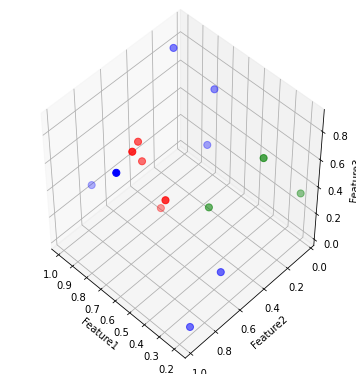

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np


def convertColor(x):
   color = 'r'
   if x == 1.0: color = 'g'
   elif x == 2.0: color = 'b'
   return color

v = np.random.rand(,4)
v[:,3] = np.random.randint(0, 3, size=15)
df = pd.DataFrame(v, columns=['Feature1', 'Feature2','Feature3',"Cluster"])
df['Color'] = df['Cluster'].apply(lambda x: convertColor(x))
df['Size'] = 50
print(df)

fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
x = np.array(df['Feature1'])
y = np.array(df['Feature2'])
z = np.array(df['Feature3'])

ax.scatter(x,y,z, marker="o", c=df["Color"], s=50, cmap="RdBu")  

ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

def convertColor(x):   # 클러스터별 색상 지정
   color = 'r'
   if x == 1.0: color = 'g'
   elif x == 2.0: color = 'b'
   return color

def convertMarker(x):   # 클러스터별 마커 지정
   marker = 'v'
   if x == 1.0: marker = '*'
   elif x == 2.0: marker = 'o'
   return marker

group=pd.read_csv("https://raw.githubusercontent.com/jhcool1988/teamdata/master/2019stats.csv", header=0)
# R	Player	Name	Club	Age	Main position	Apps	Mins	Goals	Assists	Shot per Game	Key Pass	Drb	Fouled	Rating
X = group[["Goals", "Assists", "Drb"]]

km = KMeans(n_clusters=3, random_state=2008010000)
# km.fit_predict(X)
km.fit(X)

print(km.labels_)             # 군집
print(km.cluster_centers_)    # 중심점

df = pd.DataFrame(X, columns=['Goals', 'Assists','Drb'])
labels = pd.Series(km.labels_, dtype="category")
# labels=labels.cat.rename_categories(["group1","group2","group3"])
df['Cluster'] = labels
df['Color'] = df['Cluster'].apply(lambda x: convertColor(x))
df['Marker'] = df['Cluster'].apply(lambda x: convertMarker(x))
df['Group'] = labels.cat.rename_categories(["group1","group2","group3"])

df.head(10)

[1 1 1 1 1 2 1 2 2 0 1 2 0 2 2 1 1 1 2 0 0 0 2 2 1 1 0 1 0 1 0 1 0 0 1 0 0
 0 2 0 1 0 0 1 0 2 0 2 0 1]
[[ 4.68421053  2.94736842  1.97368421]
 [16.21052632  5.31578947  2.        ]
 [ 6.75       11.5         1.975     ]]


,Goals,Assists,Drb,Cluster,Color,Marker,Group
0,19,12,5.4,1,g,*,group2
1,13,6,6.0,1,g,*,group2
2,25,3,2.1,1,g,*,group2
3,18,5,2.8,1,g,*,group2
4,15,5,2.6,1,g,*,group2
5,8,16,1.4,2,b,o,group3
6,21,3,1.8,1,g,*,group2
7,14,15,2.6,2,b,o,group3
8,8,14,2.6,2,b,o,group3
9,9,4,2.3,0,r,v,group1


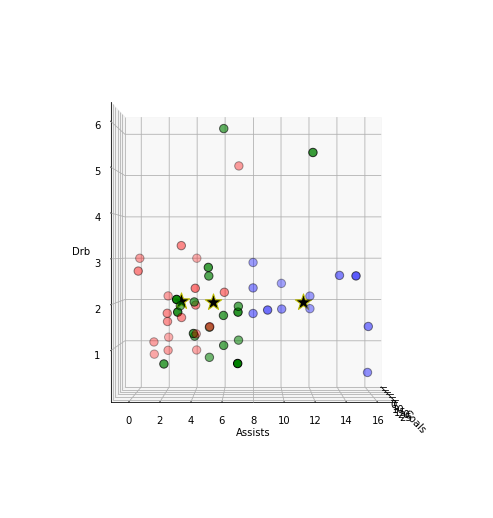

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=0, azim=0)  # elev : 위아래
x = np.array(df['Goals'])
y = np.array(df['Assists'])
z = np.array(df['Drb'])

ax.scatter(x,y,z, c=df["Color"], s=70, edgecolor='k')
ax.set_xlabel('Goals')
ax.set_ylabel('Assists')
ax.set_zlabel('Drb')

for a,b,c in km.cluster_centers_:
  ax.scatter(a,b,c, c='k', s=300, marker='*', edgecolor='y')

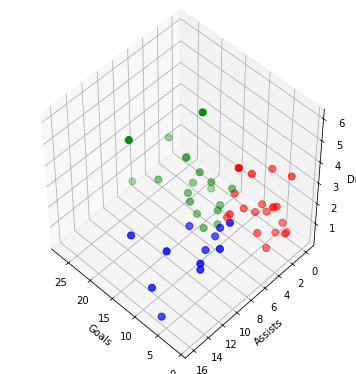

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
x = np.array(df['Goals'])
y = np.array(df['Assists'])
z = np.array(df['Drb'])

ax.scatter(x,y,z, marker="o", c=df["Color"], s=50, cmap="RdBu")  

ax.set_xlabel('Goals')
ax.set_ylabel('Assists')
ax.set_zlabel('Drb')

plt.show()